### Installing dependencies

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing libraries

In [ ]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Import data from Kaggle Website

In [ ]:
# {"username":"shivangshrivastav","key":"XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"}

In [ ]:

link = 'https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data'
od.download(link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shivangshrivastav
Your Kaggle Key: ··········


100%|██████████| 15.1M/15.1M [00:01<00:00, 9.46MB/s]



Extracting archive ./competitive-data-science-predict-future-sales/competitive-data-science-predict-future-sales.zip to ./competitive-data-science-predict-future-sales


In [ ]:
link1 = 'https://www.kaggle.com/datasets/ywhenlyn/predict-future-sales-translated-to-english/data'
od.download(link1)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shivangshrivastav
Your Kaggle Key: ··········


100%|██████████| 323k/323k [00:00<00:00, 516kB/s]

In [ ]:
!pip install downcast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from downcast import reduce


<p style="font-size:16px"> <b> Data Import </p>

### Import the data

In [ ]:
item_categories = pd.read_csv("/content/predict-future-sales-translated-to-english/item_categories.csv", encoding='cp1252')
items = pd.read_csv("/content/predict-future-sales-translated-to-english/items.csv", encoding='cp1252')
train_data = pd.read_csv("/content/competitive-data-science-predict-future-sales/sales_train.csv")
test_data = pd.read_csv("/content/competitive-data-science-predict-future-sales/test.csv")
shops = pd.read_csv("/content/predict-future-sales-translated-to-english/shops.csv", encoding='cp1252')
submission = pd.read_csv("/content/competitive-data-science-predict-future-sales/sample_submission.csv")

In [ ]:
# train_data       = pd.read_csv('/content/competitive-data-science-predict-future-sales/sales_train.csv');
# test_data        = pd.read_csv('/content/competitive-data-science-predict-future-sales/test.csv');
# submission       = pd.read_csv('/content/competitive-data-science-predict-future-sales/sample_submission.csv');
# items            = pd.read_csv('/content/competitive-data-science-predict-future-sales/items.csv');
# item_categories  = pd.read_csv('/content/competitive-data-science-predict-future-sales/item_categories.csv');
# shops            = pd.read_csv('/content/competitive-data-science-predict-future-sales/shops.csv');

### Exploring the data

In [ ]:
'''
This is a Russian dataset of a walmart type mega store which has it's outlet in almost all cities of Russia.
The dataset is divided into various parts.

1. train_data =======>  feature_names  ==> date, date_block_num, shop_id, item_id, item_price and item_count
2. item_categories ==>  feature_names  ==> item_category_name, item_category_id
3. items ============>  feature_names  ==> item_name,	item_id,	item_category_id
4. shops ============>  feature_names  ==> shop_name, shop_id
5. test_data ========>  feature_names  ==> shop_id,item_id
6. submission

'''

"\nThis is a Russian dataset of a walmart type mega store which has it's outlet in almost all cities of Russia.\nThe dataset is divided into various parts.\n\n1. train_data =======>  feature_names  ==> date, date_block_num, shop_id, item_id, item_price and item_count\n2. item_categories ==>  feature_names  ==> item_category_name, item_category_id\n3. items ============>  feature_names  ==> item_name,\titem_id,\titem_category_id\n4. shops ============>  feature_names  ==> shop_name, shop_id\n5. test_data ========>  feature_names  ==> shop_id,item_id\n6. submission\n\n"

In [ ]:
def reduce_size(df):

  x=df.memory_usage(deep=True).sum()/1024**2 
  df=reduce(df)
  y=df.memory_usage(deep=True).sum()/1024**2
  print("Memory usage decreased to {:.2f} Mb ({:.1f} % reduction)".format(y,100*(x-y)/x))

  return df

In [ ]:
print(train_data.shape)
train_data.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
print(test_data.shape)
test_data.head()

(214200, 3)


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
print(item_categories.shape)
item_categories.head()

(84, 2)


,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [ ]:
print(shops.shape)
shops.head()

(60, 2)


,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 Franc",0
1,"! Yakutsk TC ""Central"" Franc",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TRC ""October-Kinomir""",3
4,"Volzhsky mall ""Volga Mall""",4


In [ ]:
print(shops.shop_name.nunique())
print(shops.shop_id.nunique())

60
60


In [ ]:
print(items.shape)
items.head()

(22170, 3)


,item_name,item_id,item_category_id
0,! POWER IN glamor (PLAST.) D,0,40
1,! ABBYY FineReader 12 Professional Edition Ful...,1,76
2,*** In the glory (UNV) D,2,40
3,*** BLUE WAVE (Univ) D,3,40
4,*** BOX (GLASS) D,4,40


In [ ]:
print(items.item_name.nunique())
print(items.item_id.nunique())
print(items.item_category_id.nunique())

22150
22170
84


In [ ]:
train_data['Date'] = pd.to_datetime(train_data['date'])
train_data.drop('date',axis=1,inplace = True)
train_data.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Date
0,0,59,22154,999.00,1.0,2013-02-01
1,0,25,2552,899.00,1.0,2013-03-01
2,0,25,2552,899.00,-1.0,2013-05-01
3,0,25,2554,1709.05,1.0,2013-06-01
4,0,25,2555,1099.00,1.0,2013-01-15


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date_block_num  int64         
 1   shop_id         int64         
 2   item_id         int64         
 3   item_price      float64       
 4   item_cnt_day    float64       
 5   Date            datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [ ]:
train_data.shape

(2935849, 6)

In [ ]:
test_data.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


### Comparing number of shops in train and test data

In [ ]:
a = len(train_data['shop_id'].unique())
b = len(test_data['shop_id'].unique())

print(f'The number of unique shops in Train Data are: {a}')
print(f'The number of unique shops in Test Data are: {b}')

The number of unique shops in Train Data are: 60
The number of unique shops in Test Data are: 42


In [ ]:
# from above you can see that the number of unique shops given in train data is different from test data
# Hence while training, we will use only those shops in train data which are there in test data


### Extracting city names from shop names

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# city names are appended at the initial part of shops names
# Below is the code to extract the city names from the shops and hence we can get additinal feature names

In [ ]:
# Shops

def shop_name2city(sn):
    sn = sn.split()
    if sn[0] == 'Цифровой' or sn[0] == 'Интернет-магазин': sn = 'Internet'
    if sn[0] == '!': sn = sn[1]
    else: sn = sn[0] 
    return sn

shops['city_name'] = shops['shop_name'].apply(shop_name2city)
shops['city_id'] = LabelEncoder().fit_transform(shops['city_name']).astype('int8')
shops.head()


,shop_name,shop_id,city_name,city_id
0,"! Yakutsk Ordzhonikidze, 56 Franc",0,Yakutsk,28
1,"! Yakutsk TC ""Central"" Franc",1,Yakutsk,28
2,"Adygea TC ""Mega""",2,Adygea,0
3,"Balashikha TRC ""October-Kinomir""",3,Balashikha,1
4,"Volzhsky mall ""Volga Mall""",4,Volzhsky,26


In [ ]:
items.isna().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [ ]:
items

,item_name,item_id,item_category_id
0,! POWER IN glamor (PLAST.) D,0,40
1,! ABBYY FineReader 12 Professional Edition Ful...,1,76
2,*** In the glory (UNV) D,2,40
3,*** BLUE WAVE (Univ) D,3,40
4,*** BOX (GLASS) D,4,40
...,...,...,...
22165,"Nuclear titbit 2 [PC, Digital Version]",22165,31
22166,Language 1C queries: Enterprises [Digital Vers...,22166,54
22167,1C query language: Enterprise 8 (+ CD). Khrust...,22167,49
22168,Egg for Little Inu,22168,62


In [ ]:
item_categories

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4
...,...,...
79,System Tools,79
80,Utilities - Tickets,80
81,Net carriers (spire),81
82,Net carriers (piece),82


### Extracting product category from item_category_name

In [ ]:
# Product Categories can be extracted from item_category_name
# below is the code for it

In [ ]:
item_categories['Product_Category'] = item_categories['item_category_name'].str.split(n=1, expand=True)[0]
item_categories['Product_Category_id'] = LabelEncoder().fit_transform(item_categories['Product_Category'])
item_categories.head()

,item_category_name,item_category_id,Product_Category,Product_Category_id
0,PC - Headsets / Headphones,0,PC,10
1,Accessories - PS2,1,Accessories,0
2,Accessories - PS3,2,Accessories,0
3,Accessories - PS4,3,Accessories,0
4,Accessories - PSP,4,Accessories,0


In [ ]:
item_categories.Product_Category_id.unique()

array([10,  0, 15,  3,  4,  5, 11,  7,  2,  1,  8,  6, 12, 13, 14, 16,  9,
       17])

In [ ]:
item_categories.Product_Category.unique()

array(['PC', 'Accessories', 'Tickets', 'Delivery', 'Game', 'Games',
       'Payment', 'Movie', 'Cinema', 'Books', 'Music', 'Gifts', 'Program',
       'Programs', 'System', 'Utilities', 'Net', 'batteries'],
      dtype=object)

### Merging DataFrames ==> items & item_categories

In [ ]:
item_details = pd.merge(items, item_categories,on='item_category_id',how='left')
item_details.head()

,item_name,item_id,item_category_id,item_category_name,Product_Category,Product_Category_id
0,! POWER IN glamor (PLAST.) D,0,40,Movie - DVD,Movie,7
1,! ABBYY FineReader 12 Professional Edition Ful...,1,76,Program - Home & Office (Digital),Program,12
2,*** In the glory (UNV) D,2,40,Movie - DVD,Movie,7
3,*** BLUE WAVE (Univ) D,3,40,Movie - DVD,Movie,7
4,*** BOX (GLASS) D,4,40,Movie - DVD,Movie,7


In [ ]:
shops.head()

,shop_name,shop_id,city_name,city_id
0,"! Yakutsk Ordzhonikidze, 56 Franc",0,Yakutsk,28
1,"! Yakutsk TC ""Central"" Franc",1,Yakutsk,28
2,"Adygea TC ""Mega""",2,Adygea,0
3,"Balashikha TRC ""October-Kinomir""",3,Balashikha,1
4,"Volzhsky mall ""Volga Mall""",4,Volzhsky,26


In [ ]:
train_data.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'Date'],
      dtype='object')

### Merging DataFrames ==> train_data & shops

In [ ]:
df = pd.merge(train_data,shops, on=['shop_id'],how='left')
df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Date,shop_name,city_name,city_id
0,0,59,22154,999.00,1.0,2013-02-01,"Yaroslavl shopping center ""Altair""",Yaroslavl,29
1,0,25,2552,899.00,1.0,2013-03-01,"Moscow SEC ""Atrium""",Moscow,11
2,0,25,2552,899.00,-1.0,2013-05-01,"Moscow SEC ""Atrium""",Moscow,11
3,0,25,2554,1709.05,1.0,2013-06-01,"Moscow SEC ""Atrium""",Moscow,11
4,0,25,2555,1099.00,1.0,2013-01-15,"Moscow SEC ""Atrium""",Moscow,11


### Merging DataFrames ==> shops and previous DataFrame

In [ ]:
df = pd.merge(df,item_details,on=['item_id'],how='left')
df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Date,shop_name,city_name,city_id,item_name,item_category_id,item_category_name,Product_Category,Product_Category_id
0,0,59,22154,999.00,1.0,2013-02-01,"Yaroslavl shopping center ""Altair""",Yaroslavl,29,Scene 2012 (BD),37,Movie - Blu-Ray,Movie,7
1,0,25,2552,899.00,1.0,2013-03-01,"Moscow SEC ""Atrium""",Moscow,11,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,Music,8
2,0,25,2552,899.00,-1.0,2013-05-01,"Moscow SEC ""Atrium""",Moscow,11,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,Music,8
3,0,25,2554,1709.05,1.0,2013-06-01,"Moscow SEC ""Atrium""",Moscow,11,DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl,Music,8
4,0,25,2555,1099.00,1.0,2013-01-15,"Moscow SEC ""Atrium""",Moscow,11,DEEP PURPLE 30 Very Best Of 2CD (Businesses).,56,Music - CD production firm,Music,8


In [ ]:
df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'Date', 'shop_name', 'city_name', 'city_id', 'item_name',
       'item_category_id', 'item_category_name', 'Product_Category',
       'Product_Category_id'],
      dtype='object')

### Checking the description of Nominal Features and correcting the data frame

In [ ]:
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,city_id,item_category_id,Product_Category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,1.503377e+01,4.000138e+01,6.123925e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,7.652947e+00,1.710076e+01,2.154331e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,1.100000e+01,2.800000e+01,5.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,1.100000e+01,4.000000e+01,6.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,2.100000e+01,5.500000e+01,7.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,3.000000e+01,8.300000e+01,1.700000e+01


In [ ]:
# As you can see, item_price and item_cnt_day are negative and prices and count of items cannot be negative.
# This means some amount of data is erroneous.
# Hence, removing rows with negative values of item_price and item_cnt_day

In [ ]:
df = df[df['item_price'] >= 0]
df = df[df['item_cnt_day'] >= 0]
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,city_id,item_category_id,Product_Category_id
count,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06
mean,1.456976e+01,3.300295e+01,1.020028e+04,8.894668e+02,1.248337e+00,1.503268e+01,4.001636e+01,6.125053e+00
std,9.422951e+00,1.622543e+01,6.324396e+03,1.727499e+03,2.619586e+00,7.653066e+00,1.709811e+01,2.154045e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.477000e+03,2.490000e+02,1.000000e+00,1.100000e+01,2.800000e+01,5.000000e+00
50%,1.400000e+01,3.100000e+01,9.355000e+03,3.990000e+02,1.000000e+00,1.100000e+01,4.000000e+01,6.000000e+00
75%,2.300000e+01,4.700000e+01,1.569100e+04,9.990000e+02,1.000000e+00,2.100000e+01,5.500000e+01,7.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,3.000000e+01,8.300000e+01,1.700000e+01


### Checking for outliers in item_price and item_cnt_day

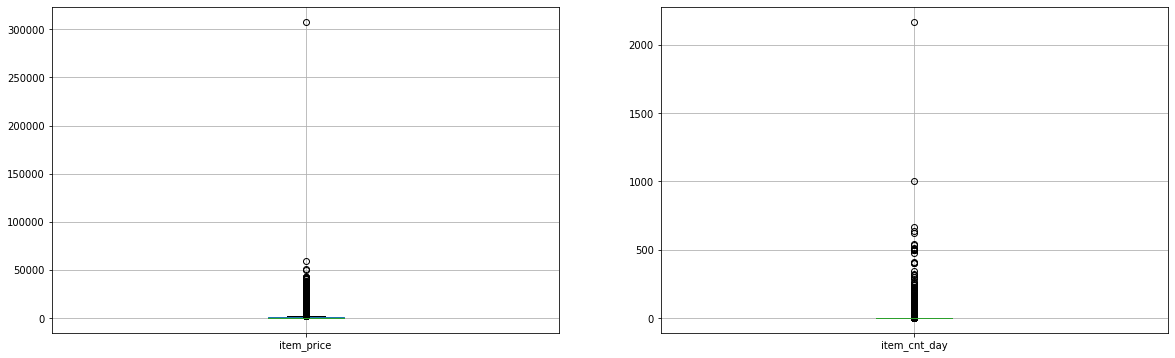

In [ ]:
fig = plt.figure(figsize =(20, 6))

plt.subplot(121)
df.boxplot(['item_price'])

plt.subplot(122)
df.boxplot(['item_cnt_day'])

plt.show()

In [ ]:
# Removing outliers

In [ ]:
df = df[df['item_price'] <= 50000]
df = df[df['item_cnt_day'] <= 1000]

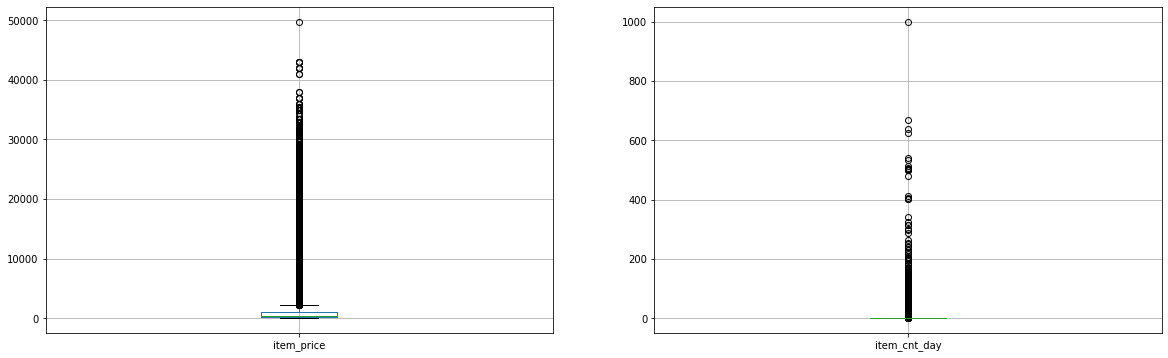

In [ ]:
fig = plt.figure(figsize =(20, 6))

plt.subplot(121)
df.boxplot(['item_price'])

plt.subplot(122)
df.boxplot(['item_cnt_day'])

plt.show()

### Grouping the data according to date_block_num and finding the aggregate sum of item_cnt_day

In [ ]:
monthly_sales = df.groupby(['date_block_num']).agg({'item_cnt_day':'sum'}).reset_index()
monthly_sales.rename(columns={'item_cnt_day':'Monthly_Sales'},inplace=True)
monthly_sales.head()

,date_block_num,Monthly_Sales
0,0,131850.0
1,1,128382.0
2,2,147438.0
3,3,107439.0
4,4,107147.0


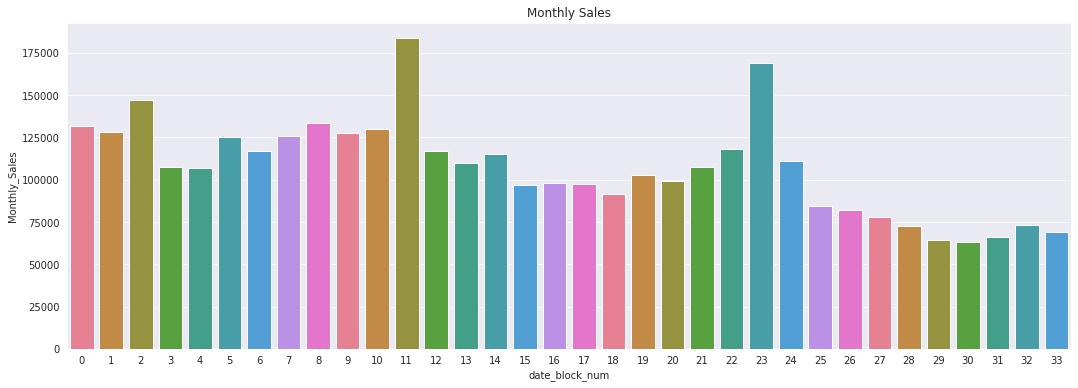

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
palette = sns.color_palette("husl", 9)
plt.figure(figsize=(18,6))
plt.title('Monthly Sales')
sns.barplot(data=monthly_sales, x='date_block_num', y='Monthly_Sales',palette = palette)
plt.show()

In [ ]:
# For monthly sales data, as we can see in the above graph, there are two sales peak in monthly sales

### Grouping the data according to ['date_block_num', 'shop_id'] and finding the aggregate or total number of shops active per month

In [ ]:
shops_monthly_cnt = df[['date_block_num', 'shop_id']].drop_duplicates().groupby('date_block_num').size().reset_index()
shops_monthly_cnt.columns = ['date_block_num', 'Monthly_Shops_Count']

shops_monthly_cnt.head()

,date_block_num,Monthly_Shops_Count
0,0,45
1,1,46
2,2,46
3,3,45
4,4,45


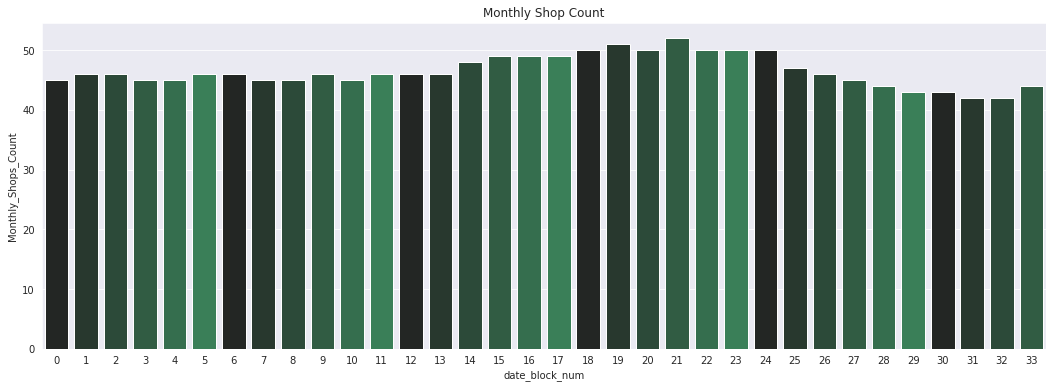

In [ ]:
sns.set_style("darkgrid")
palette = sns.dark_palette("seagreen")
plt.figure(figsize=(18,6))
plt.title('Monthly Shop Count')
sns.barplot(data=shops_monthly_cnt, x='date_block_num', y='Monthly_Shops_Count',palette = palette)
plt.show()

In [ ]:
# As you can see in the above graph, where number of shops active per month hovers around 40 - 50.
# Number of shops peaked around the month 19,20,21
# Lowest count of active shops is in month  31,32

### Grouping the data according to ['date_block_num', 'item_id'] and finding the aggregate or total number of items sold per month

In [ ]:
items_monthly_cnt1 = df[['date_block_num', 'item_id']].drop_duplicates().groupby('date_block_num').count().reset_index()
items_monthly_cnt1.head()

,date_block_num,item_id
0,0,8110
1,1,8166
2,2,8300
3,3,8140
4,4,8337


In [ ]:
items_monthly_cnt2 = df[['date_block_num', 'item_id']].drop_duplicates().groupby('date_block_num').size().reset_index()
items_monthly_cnt2.head()

,date_block_num,0
0,0,8110
1,1,8166
2,2,8300
3,3,8140
4,4,8337


In [ ]:
items_monthly_cnt = df[['date_block_num', 'item_id']].drop_duplicates().groupby('date_block_num').size().reset_index()
items_monthly_cnt.columns = ['date_block_num', 'Monthly_items_Count']

items_monthly_cnt.head()

,date_block_num,Monthly_items_Count
0,0,8110
1,1,8166
2,2,8300
3,3,8140
4,4,8337


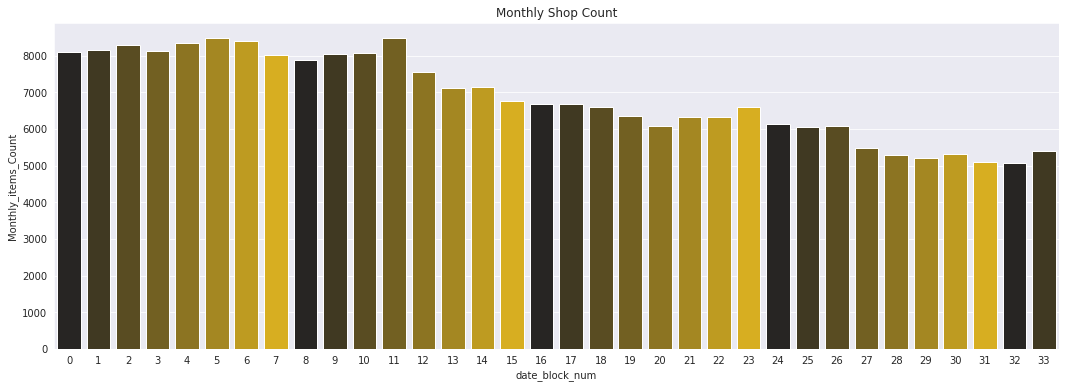

In [ ]:
sns.set_style("darkgrid")
palette = sns.dark_palette("xkcd:golden", 8)
plt.figure(figsize=(18,6))
plt.title('Monthly Shop Count')
sns.barplot(data=items_monthly_cnt, x='date_block_num', y='Monthly_items_Count',palette = palette)
plt.show()

In [ ]:
df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Date,shop_name,city_name,city_id,item_name,item_category_id,item_category_name,Product_Category,Product_Category_id
0,0,59,22154,999.00,1.0,2013-02-01,"Yaroslavl shopping center ""Altair""",Yaroslavl,29,Scene 2012 (BD),37,Movie - Blu-Ray,Movie,7
1,0,25,2552,899.00,1.0,2013-03-01,"Moscow SEC ""Atrium""",Moscow,11,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,Music,8
3,0,25,2554,1709.05,1.0,2013-06-01,"Moscow SEC ""Atrium""",Moscow,11,DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl,Music,8
4,0,25,2555,1099.00,1.0,2013-01-15,"Moscow SEC ""Atrium""",Moscow,11,DEEP PURPLE 30 Very Best Of 2CD (Businesses).,56,Music - CD production firm,Music,8
5,0,25,2564,349.00,1.0,2013-10-01,"Moscow SEC ""Atrium""",Moscow,11,DEEP PURPLE Perihelion: Live In Concert DVD (C...,59,Music - Music video,Music,8


### Grouping the data according to ['date_block_num', 'shop_id', 'item_id'] and finding the aggregate or total number of combination of shops and items sold per month

In [ ]:
shops_item_combo = df[['date_block_num', 'shop_id','item_id']].drop_duplicates().groupby('date_block_num').size().reset_index()
shops_item_combo.columns = ['date_block_num', 'item-shop_comb']

shops_item_combo.head()

,date_block_num,item-shop_comb
0,0,63170
1,1,59911
2,2,63951
3,3,54590
4,4,53276


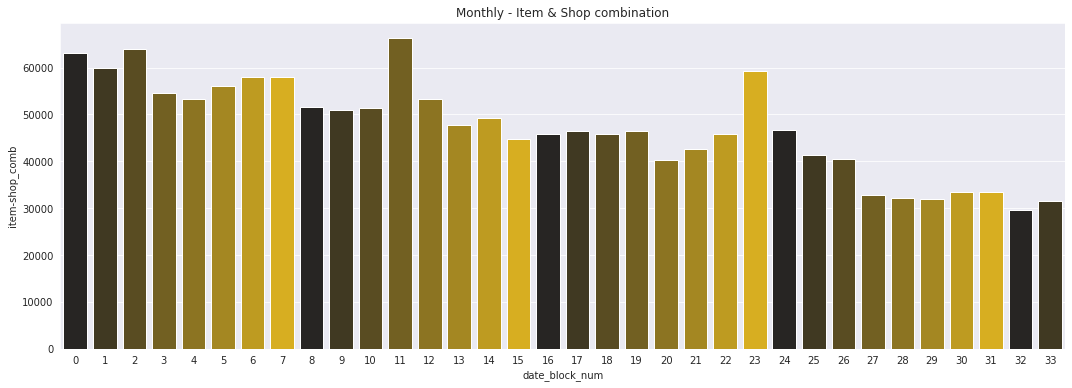

In [ ]:
sns.set_style("darkgrid")
palette = sns.dark_palette("xkcd:golden", 8)
plt.figure(figsize=(18,6))
plt.title('Monthly - Item & Shop combination')
sns.barplot(data=shops_item_combo, x='date_block_num', y='item-shop_comb',palette = palette)
plt.show()

### Grouping the data according to ['shop_id'] and finding the aggregate or total number of combination of items sold per shop

In [ ]:
items_per_shop = df.groupby('shop_id').agg({'item_cnt_day':'sum'}).reset_index().rename(columns={'item_cnt_day':'total_cnt_items'}).sort_values(by='total_cnt_items', ascending=False)
items_per_shop.head()


,shop_id,total_cnt_items
31,31,311230.0
25,25,242236.0
54,54,186149.0
28,28,184777.0
42,42,145195.0


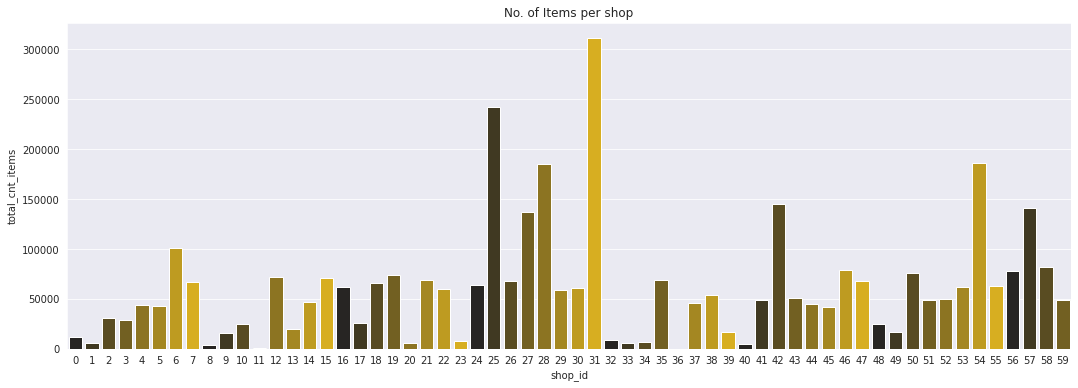

In [ ]:
sns.set_style("darkgrid")
palette = sns.dark_palette("xkcd:golden", 8)
plt.figure(figsize=(18,6))
plt.title('No. of Items per shop')
sns.barplot(data=items_per_shop, x='shop_id', y='total_cnt_items',palette = palette)
plt.show()

### Grouping the data according to 'city_name' and finding the aggregate or total number of items sold per city

In [ ]:
items_per_city = df.groupby('city_name').agg({'item_cnt_day':'sum'}).reset_index().rename(columns={'item_cnt_day':'total_cnt_items'}).sort_values(by='total_cnt_items', ascending=False)
items_per_city.head()


,city_name,total_cnt_items
11,Moscow,1278330.0
28,Yakutsk,241348.0
20,St.,196018.0
7,Khimki,186149.0
27,Voronezh,171518.0


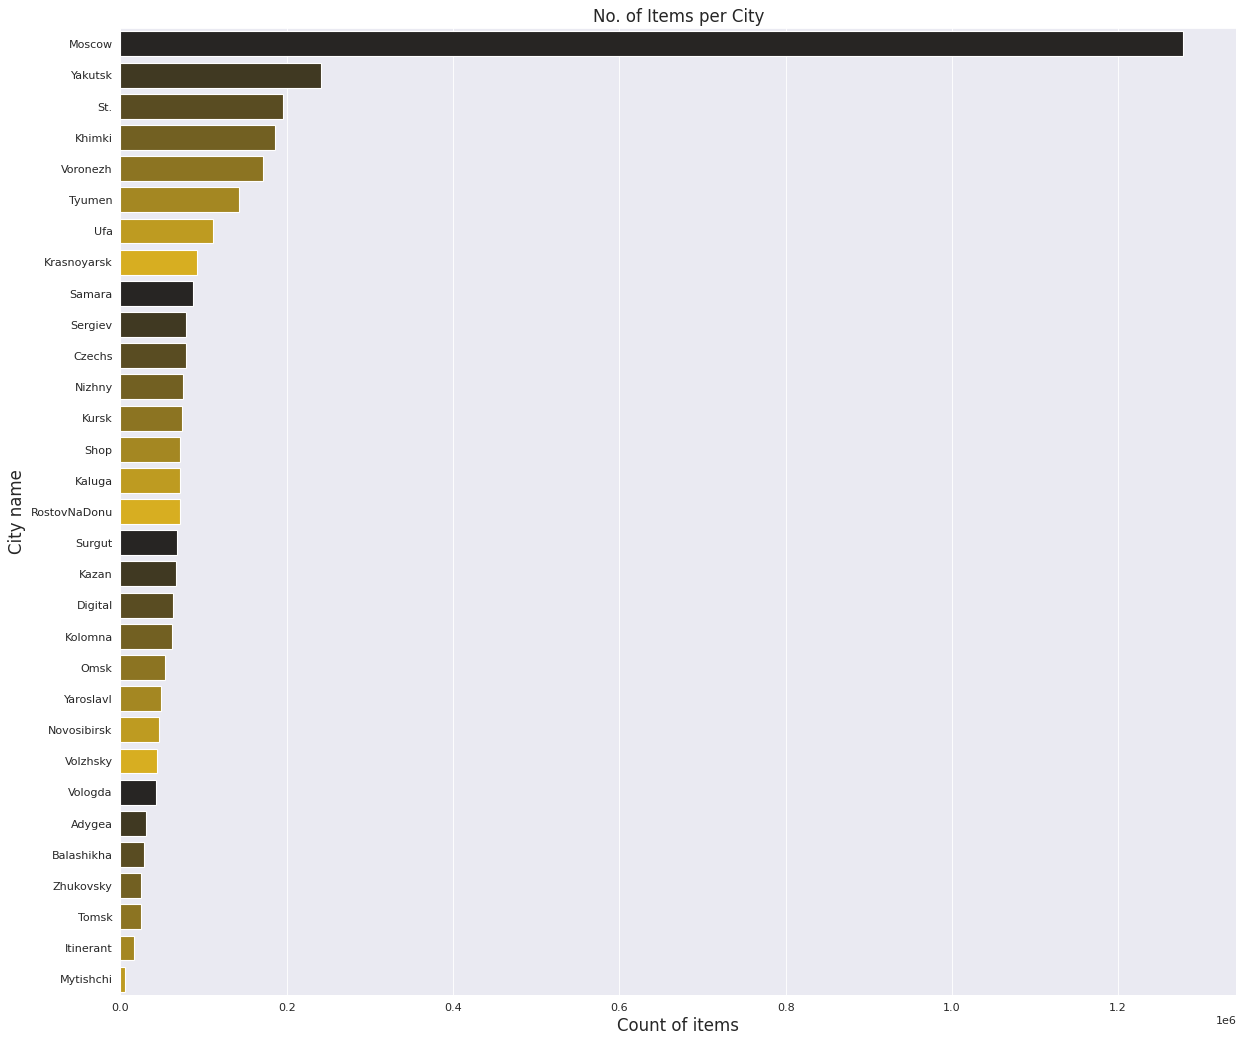

In [ ]:
sns.set_style("darkgrid")
palette = sns.dark_palette("xkcd:golden", 8)

plt.figure(figsize=(18,16), dpi=80)

sns.barplot(data=items_per_city, x='total_cnt_items', y='city_name',palette = palette)

plt.title('No. of Items per City', size=15)
plt.xlabel('Count of items', size=15)
plt.ylabel('City name', size=15)

plt.show()

### Grouping the data according to ['item_category_name'] and finding the aggregate or total number of items sold per item_category_name

In [ ]:
items_per_city = df.groupby('item_category_name').agg({'item_cnt_day':'sum'}).reset_index().rename(columns={'item_cnt_day':'total_cnt_items'}).sort_values(by='total_cnt_items', ascending=False)
items_per_city.head()

,item_category_name,total_cnt_items
59,Movie - DVD,634885.0
43,Games PC - Standard Edition,457359.0
60,Music - CD of local production,349050.0
32,Games - PS3,255756.0
56,Movie - Blu-Ray,204031.0


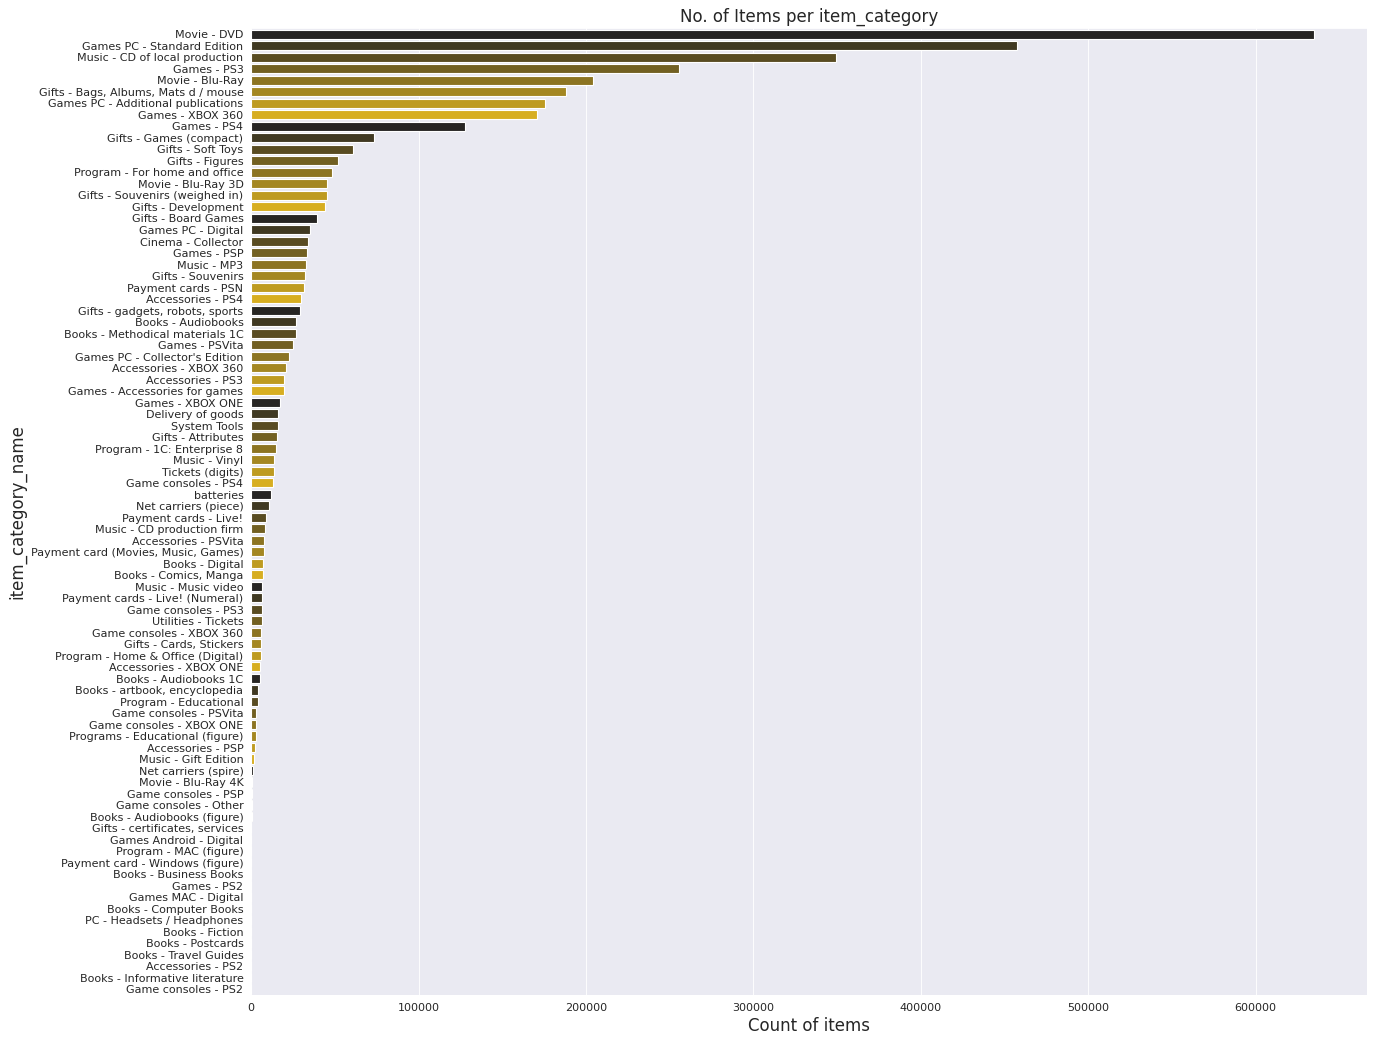

In [ ]:
sns.set_style("darkgrid")
palette = sns.dark_palette("xkcd:golden", 8)

plt.figure(figsize=(18,16), dpi=80)

sns.barplot(data=items_per_city, x='total_cnt_items', y='item_category_name',palette = palette)

plt.title('No. of Items per item_category', size=15)
plt.xlabel('Count of items', size=15)
plt.ylabel('item_category_name', size=15)

plt.show()

### Grouping the data according to ['Product_Category'] and finding the aggregate or total number of items sold per Product_Category

In [ ]:
items_per_city = df.groupby('Product_Category').agg({'item_cnt_day':'sum'}).reset_index().rename(columns={'item_cnt_day':'total_cnt_items'}).sort_values(by='total_cnt_items', ascending=False)
items_per_city.head()

,Product_Category,total_cnt_items
5,Games,1339513.0
7,Movie,884817.0
6,Gifts,584956.0
8,Music,411975.0
0,Accessories,85444.0


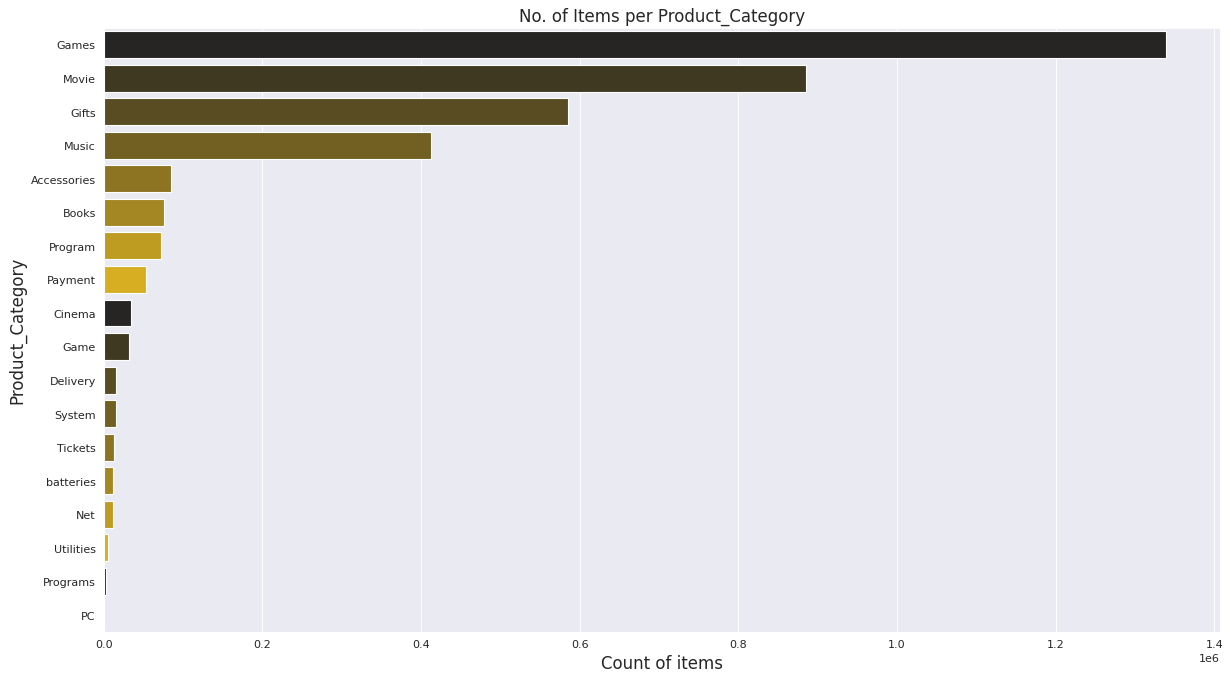

In [ ]:
sns.set_style("darkgrid")
palette = sns.dark_palette("xkcd:golden", 8)

plt.figure(figsize=(18,10), dpi=80)

sns.barplot(data=items_per_city, x='total_cnt_items', y='Product_Category',palette = palette)

plt.title('No. of Items per Product_Category', size=15)
plt.xlabel('Count of items', size=15)
plt.ylabel('Product_Category', size=15)

plt.show()

### Grouping the data according to ['shop_id', 'item_id'] and finding the aggregate or total number of items sold per item_id per shop

In [ ]:
df1 = df.groupby(['shop_id', 'item_id'])['item_cnt_day'].sum().reset_index()
df1

,shop_id,item_id,item_cnt_day
0,0,30,31.0
1,0,31,11.0
2,0,32,16.0
3,0,33,6.0
4,0,35,15.0
...,...,...,...
424091,59,22154,1.0
424092,59,22155,1.0
424093,59,22162,16.0
424094,59,22164,6.0


In [ ]:
df1.describe()

,shop_id,item_id,item_cnt_day
count,424096.000000,424096.000000,424096.000000
mean,31.431539,11458.052358,8.614969
std,16.962081,6133.436977,64.084002
min,0.000000,0.000000,1.000000
25%,18.000000,6244.000000,1.000000
50%,30.000000,11614.000000,3.000000
75%,46.000000,16662.000000,7.000000
max,59.000000,22169.000000,19934.000000


In [ ]:
df1.sort_values('item_cnt_day',ascending = False).head(10)

,shop_id,item_id,item_cnt_day
230412,31,20949,19934.0
165987,25,20949,14343.0
198862,28,20949,13458.0
382346,54,20949,12323.0
286937,42,20949,10514.0
186368,27,20949,8266.0
64246,12,11370,6163.0
407773,57,20949,6116.0
327184,47,20949,4530.0
64249,12,11373,4394.0


In [ ]:
df1 = df.groupby(['shop_id', 'item_id'])['item_cnt_day'].sum().reset_index()
df1

,shop_id,item_id,item_cnt_day
0,0,30,31.0
1,0,31,11.0
2,0,32,16.0
3,0,33,6.0
4,0,35,15.0
...,...,...,...
424091,59,22154,1.0
424092,59,22155,1.0
424093,59,22162,16.0
424094,59,22164,6.0


In [ ]:
items_to_drop = df1[df1['item_cnt_day'] <= 0].index
items_to_drop

Int64Index([], dtype='int64')

In [ ]:
df5 = df1[~df1.index.isin(items_to_drop)]
df5

,shop_id,item_id,item_cnt_day
0,0,30,31.0
1,0,31,11.0
2,0,32,16.0
3,0,33,6.0
4,0,35,15.0
...,...,...,...
424091,59,22154,1.0
424092,59,22155,1.0
424093,59,22162,16.0
424094,59,22164,6.0
